In [1]:
import urllib

In [2]:
!pip install bs4

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [4]:
url = urllib.request.urlopen('https://en.wikipedia.org/wiki/Rajgad_Fort')
html = url.read()

In [5]:
print(html)

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-night-mode-clientpref-0 vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Rajgad Fort - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled ve

In [6]:
from bs4 import BeautifulSoup

In [18]:
soup = BeautifulSoup(html, 'html')

In [21]:
text = soup.get_text(strip=False)

In [23]:
print(text)





Rajgad Fort - Wikipedia




































Jump to content







Main menu





Main menu
move to sidebar
hide



		Navigation
	


Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate





		Contribute
	


HelpLearn to editCommunity portalRecent changesUpload file





Languages

Language links are at the top of the page.



















Search











Search





























Create account

Log in








Personal tools





 Create account Log in





		Pages for logged out editors learn more



ContributionsTalk




























Contents
move to sidebar
hide




(Top)





1History



Toggle History subsection





1.1List of chronological events









2Tourism







3Gallery







4See also







5References







6External links

















Toggle the table of contents







Rajgad Fort



7 languages




Españolहिन्दीमराठीمصرىनेपाल भाषाپنجابیاردو

Edit links











ArticleTalk





English

In [16]:
help(soup.get_text)

Help on method get_text in module bs4.element:

get_text(separator='', strip=False, types=<object object at 0x7fccb444e1c0>) method of bs4.BeautifulSoup instance
    Get all child strings of this PageElement, concatenated using the
    given separator.
    
    :param separator: Strings will be concatenated using this separator.
    
    :param strip: If True, strings will be stripped before being
        concatenated.
    
    :param types: A tuple of NavigableString subclasses. Any
        strings of a subclass not found in this list will be
        ignored. Although there are exceptions, the default
        behavior in most cases is to consider only NavigableString
        and CData objects. That means no comments, processing
        instructions, etc.
    
    :return: A string.



In [24]:
from nltk.tokenize import word_tokenize

In [25]:
tokens1 = word_tokenize(text)

In [26]:
from nltk import FreqDist
freq = FreqDist(tokens1)

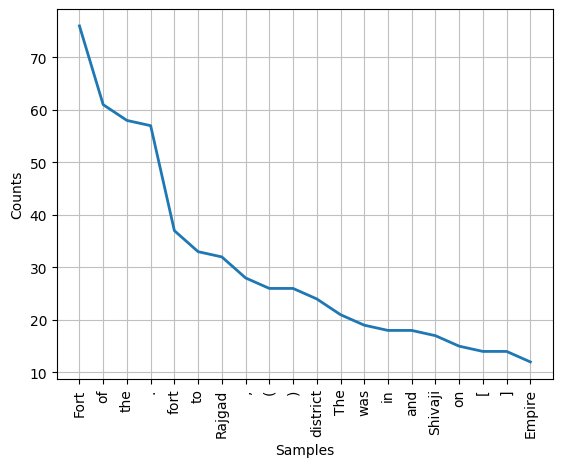

<Axes: xlabel='Samples', ylabel='Counts'>

In [27]:
freq.plot(20)

In [30]:
from nltk.corpus import stopwords

In [29]:
swords = stopwords.words('english')

In [33]:
# punctuation removal
tokens2 = [x for x in tokens1 if x.isalpha()]

In [36]:
# stopword removal
tokens3 = [x.lower() for x in tokens2 if x.lower() not in swords]

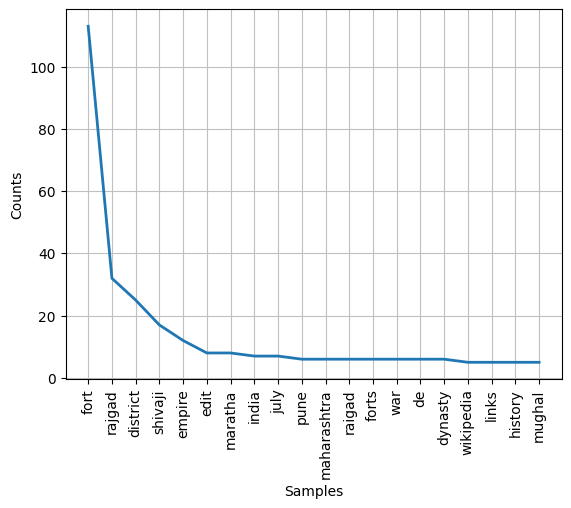

<Axes: xlabel='Samples', ylabel='Counts'>

In [37]:
freq = FreqDist(tokens3)
freq.plot(20)

In [38]:
freq.most_common(20)

[('fort', 113),
 ('rajgad', 32),
 ('district', 25),
 ('shivaji', 17),
 ('empire', 12),
 ('edit', 8),
 ('maratha', 8),
 ('india', 7),
 ('july', 7),
 ('pune', 6),
 ('maharashtra', 6),
 ('raigad', 6),
 ('forts', 6),
 ('war', 6),
 ('de', 6),
 ('dynasty', 6),
 ('wikipedia', 5),
 ('links', 5),
 ('history', 5),
 ('mughal', 5)]

In [41]:
# stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [42]:
tokens4 = [ps.stem(x) for x in tokens3]

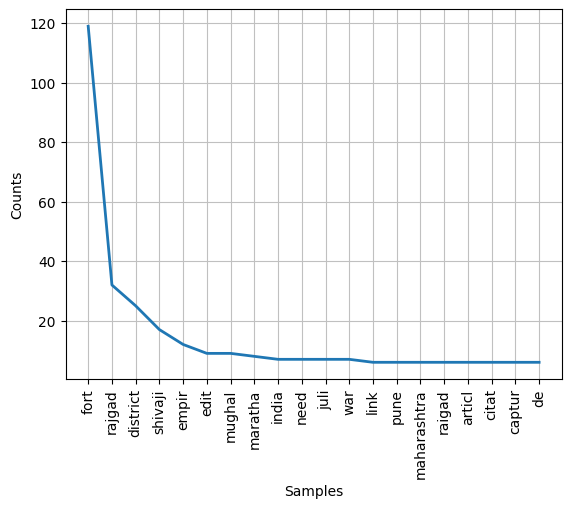

<Axes: xlabel='Samples', ylabel='Counts'>

In [43]:
freq = FreqDist(tokens4)
freq.plot(20)

In [52]:
url = urllib.request.urlopen('https://en.wikipedia.org/wiki/Tiger')
html = url.read()

soup = BeautifulSoup(html, 'html')
text = soup.get_text(strip=False)
tokens1 = word_tokenize(text)

# punctuation removal
tokens2 = [x for x in tokens1 if x.isalpha()]

# stopword removal
tokens3 = [x.lower() for x in tokens2 if x.lower() not in swords]

tokens4 = [ps.stem(x) for x in tokens3]
freq = FreqDist(tokens4)
freq.most_common(3)

[('tiger', 524), ('popul', 64), ('tigri', 60)]